<a href="https://colab.research.google.com/github/br4bit/Neural-Network-Training/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [419]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [420]:
from keras import *
from keras import backend as K
K.set_image_data_format('channels_first')
import cv2
import os
import sys
sys.path.insert(0, './drive/My Drive/DL/Face Recognition')
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
from fr_utils import *
from matplotlib.pyplot import *
import scipy
from inception_blocks_v2 import *
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(threshold=np.nan)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
FRmodel = faceRecoModel(input_shape=(3, 96, 96))

In [0]:
FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])
load_weights_from_FaceNet(FRmodel)

In [423]:
#Load all images in a database with new size (96,96)
#The images must be in a folder with User name for mapping in database as Name->Image vector encoding (128-d)
print("Total Params:", FRmodel.count_params())
path='./drive/My Drive/DL/Face Recognition/images/'
database={} #Use Dictionary with multiple values for each key
database = load_images(path,database,FRmodel)

Total Params: 3743280


(96, 96, 3)
it's Salvatore, the distance is 0.41287798
OPEN DOOR!


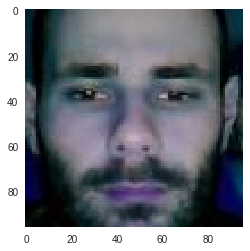

In [426]:
# Preprocess image for fit in algorithm
from PIL.Image import ANTIALIAS
captured_image = "camera.jpg"
fname = path + captured_image
captured_image = cv2.imread(fname)
print(captured_image.shape)
if not ((captured_image.shape[0],captured_image.shape[1]) == (96,96)):
    detected_face,_,coord = detect_faces(captured_image)
    if (len(detected_face),len(coord)) == (0,0):
      print("No Face Detected")
    else:
      area = [coord[0], coord[1], coord[0]+coord[2], coord[1]+coord[3]]
      cropped = (crop(fname, area)).resize((96,96), ANTIALIAS)
      scipy.misc.imsave(fname,cropped)
  
plt.imshow(cv2.imread(fname))
plt.grid(False)
who_is_it(fname, database, FRmodel)

In [424]:
for key, db_enc in database.items():
  print(key,len(db_enc))

Salvatore 9
Stefania 8
Carla 1


In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='./drive/My Drive/DL/Face Recognition/images/camera.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))